In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Data Generation

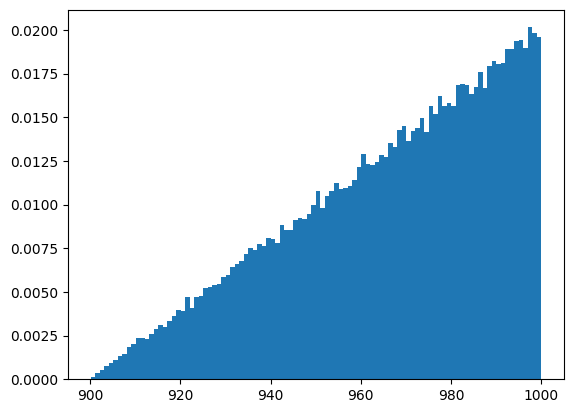

<function matplotlib.pyplot.show(close=None, block=None)>

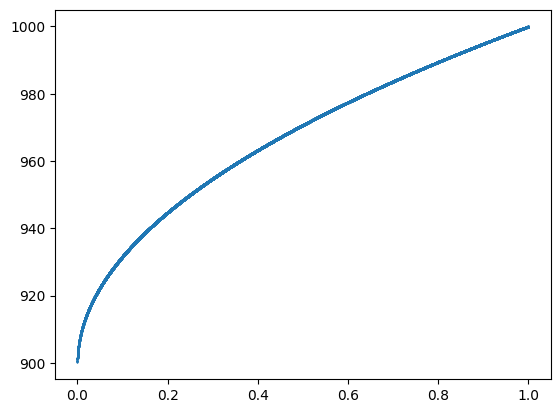

In [4]:
np.random.seed(61)

# generate uniform distribution
n = 100000
x = np.random.uniform(0, 1, n)

# generate reserve prices
a = 1/10000
b = -9/50
c = 81 - x
reserve_prices = (-(b) + np.sqrt(b**2 - 4*a*c)) / (2*a)

# plot histogram
plt.hist(reserve_prices, bins=100, density=True)
plt.show()

# plot scatter plot
plt.scatter(x, reserve_prices, s=0.1)
plt.show

In [5]:
print(reserve_prices.shape)
print(reserve_prices)

(100000,)
[990.80030154 942.58517729 993.66572309 ... 982.25007683 985.85114168
 968.05119973]


# Defining Helper Functions for Sims

In [6]:
def get_p(avg, h):
    return (1000-avg)/(1000-h)

def decide(rp, l, h, island_avg=990):
    if (l >= rp):
        return 1000 - l
    elif (h >= rp):
        if (h < island_avg):
            p = get_p(island_avg, h)
        else:
            p = 1
        return (1000 - h) * p
    else:
        return 0


In [7]:
def find_l(h, island_avg):
    max_total = 0
    iter = 0
    all_totals = {}
    for l in range(900, h):
        total = 0
        for rp in reserve_prices:
            total += decide(rp, l, h, island_avg)
        all_totals[total] = l
        max_total = max(max_total, total)
        iter += 1
        if iter % 500 == 0:
            print(f"i_no: {iter}, max profit: {max_total}, bids: {all_totals[max_total]}")
    return all_totals[max_total]

print(find_l(978, 978))

952


### Testing Pandas

In [8]:
test = pd.Series()
test[0] = 2
print(test)

0    2
dtype: int64


# Starting Sims

In [10]:
save_folder = "computation_results/"

In [16]:
# for each island average, find all the expected profits given other possible island averages
expected_profits = pd.Series()
iter = 0

for l in range(952, 998):
        for h in range(l + 1, 999):
            expected_profits = pd.Series()
            for actual_island_avg in range(978, 1000):
                total = 0
                for rp in reserve_prices:
                    total += decide(rp, l, h, actual_island_avg)
                expected_profits[actual_island_avg] = total
            expected_profits.to_csv(save_folder + f"expected_profits_{l}-{h}.csv")
            iter += 1
            print(f"i_no: {iter}, l: {l}, h: {h}")

i_no: 1, l: 952, h: 953
i_no: 2, l: 952, h: 954
i_no: 3, l: 952, h: 955
i_no: 4, l: 952, h: 956
i_no: 5, l: 952, h: 957
i_no: 6, l: 952, h: 958
i_no: 7, l: 952, h: 959
i_no: 8, l: 952, h: 960
i_no: 9, l: 952, h: 961
i_no: 10, l: 952, h: 962
i_no: 11, l: 952, h: 963
i_no: 12, l: 952, h: 964
i_no: 13, l: 952, h: 965
i_no: 14, l: 952, h: 966
i_no: 15, l: 952, h: 967
i_no: 16, l: 952, h: 968
i_no: 17, l: 952, h: 969
i_no: 18, l: 952, h: 970
i_no: 19, l: 952, h: 971
i_no: 20, l: 952, h: 972
i_no: 21, l: 952, h: 973
i_no: 22, l: 952, h: 974
i_no: 23, l: 952, h: 975
i_no: 24, l: 952, h: 976
i_no: 25, l: 952, h: 977
i_no: 26, l: 952, h: 978
i_no: 27, l: 952, h: 979
i_no: 28, l: 952, h: 980
i_no: 29, l: 952, h: 981
i_no: 30, l: 952, h: 982
i_no: 31, l: 952, h: 983
i_no: 32, l: 952, h: 984
i_no: 33, l: 952, h: 985
i_no: 34, l: 952, h: 986
i_no: 35, l: 952, h: 987
i_no: 36, l: 952, h: 988
i_no: 37, l: 952, h: 989
i_no: 38, l: 952, h: 990
i_no: 39, l: 952, h: 991
i_no: 40, l: 952, h: 992
i_no: 41,

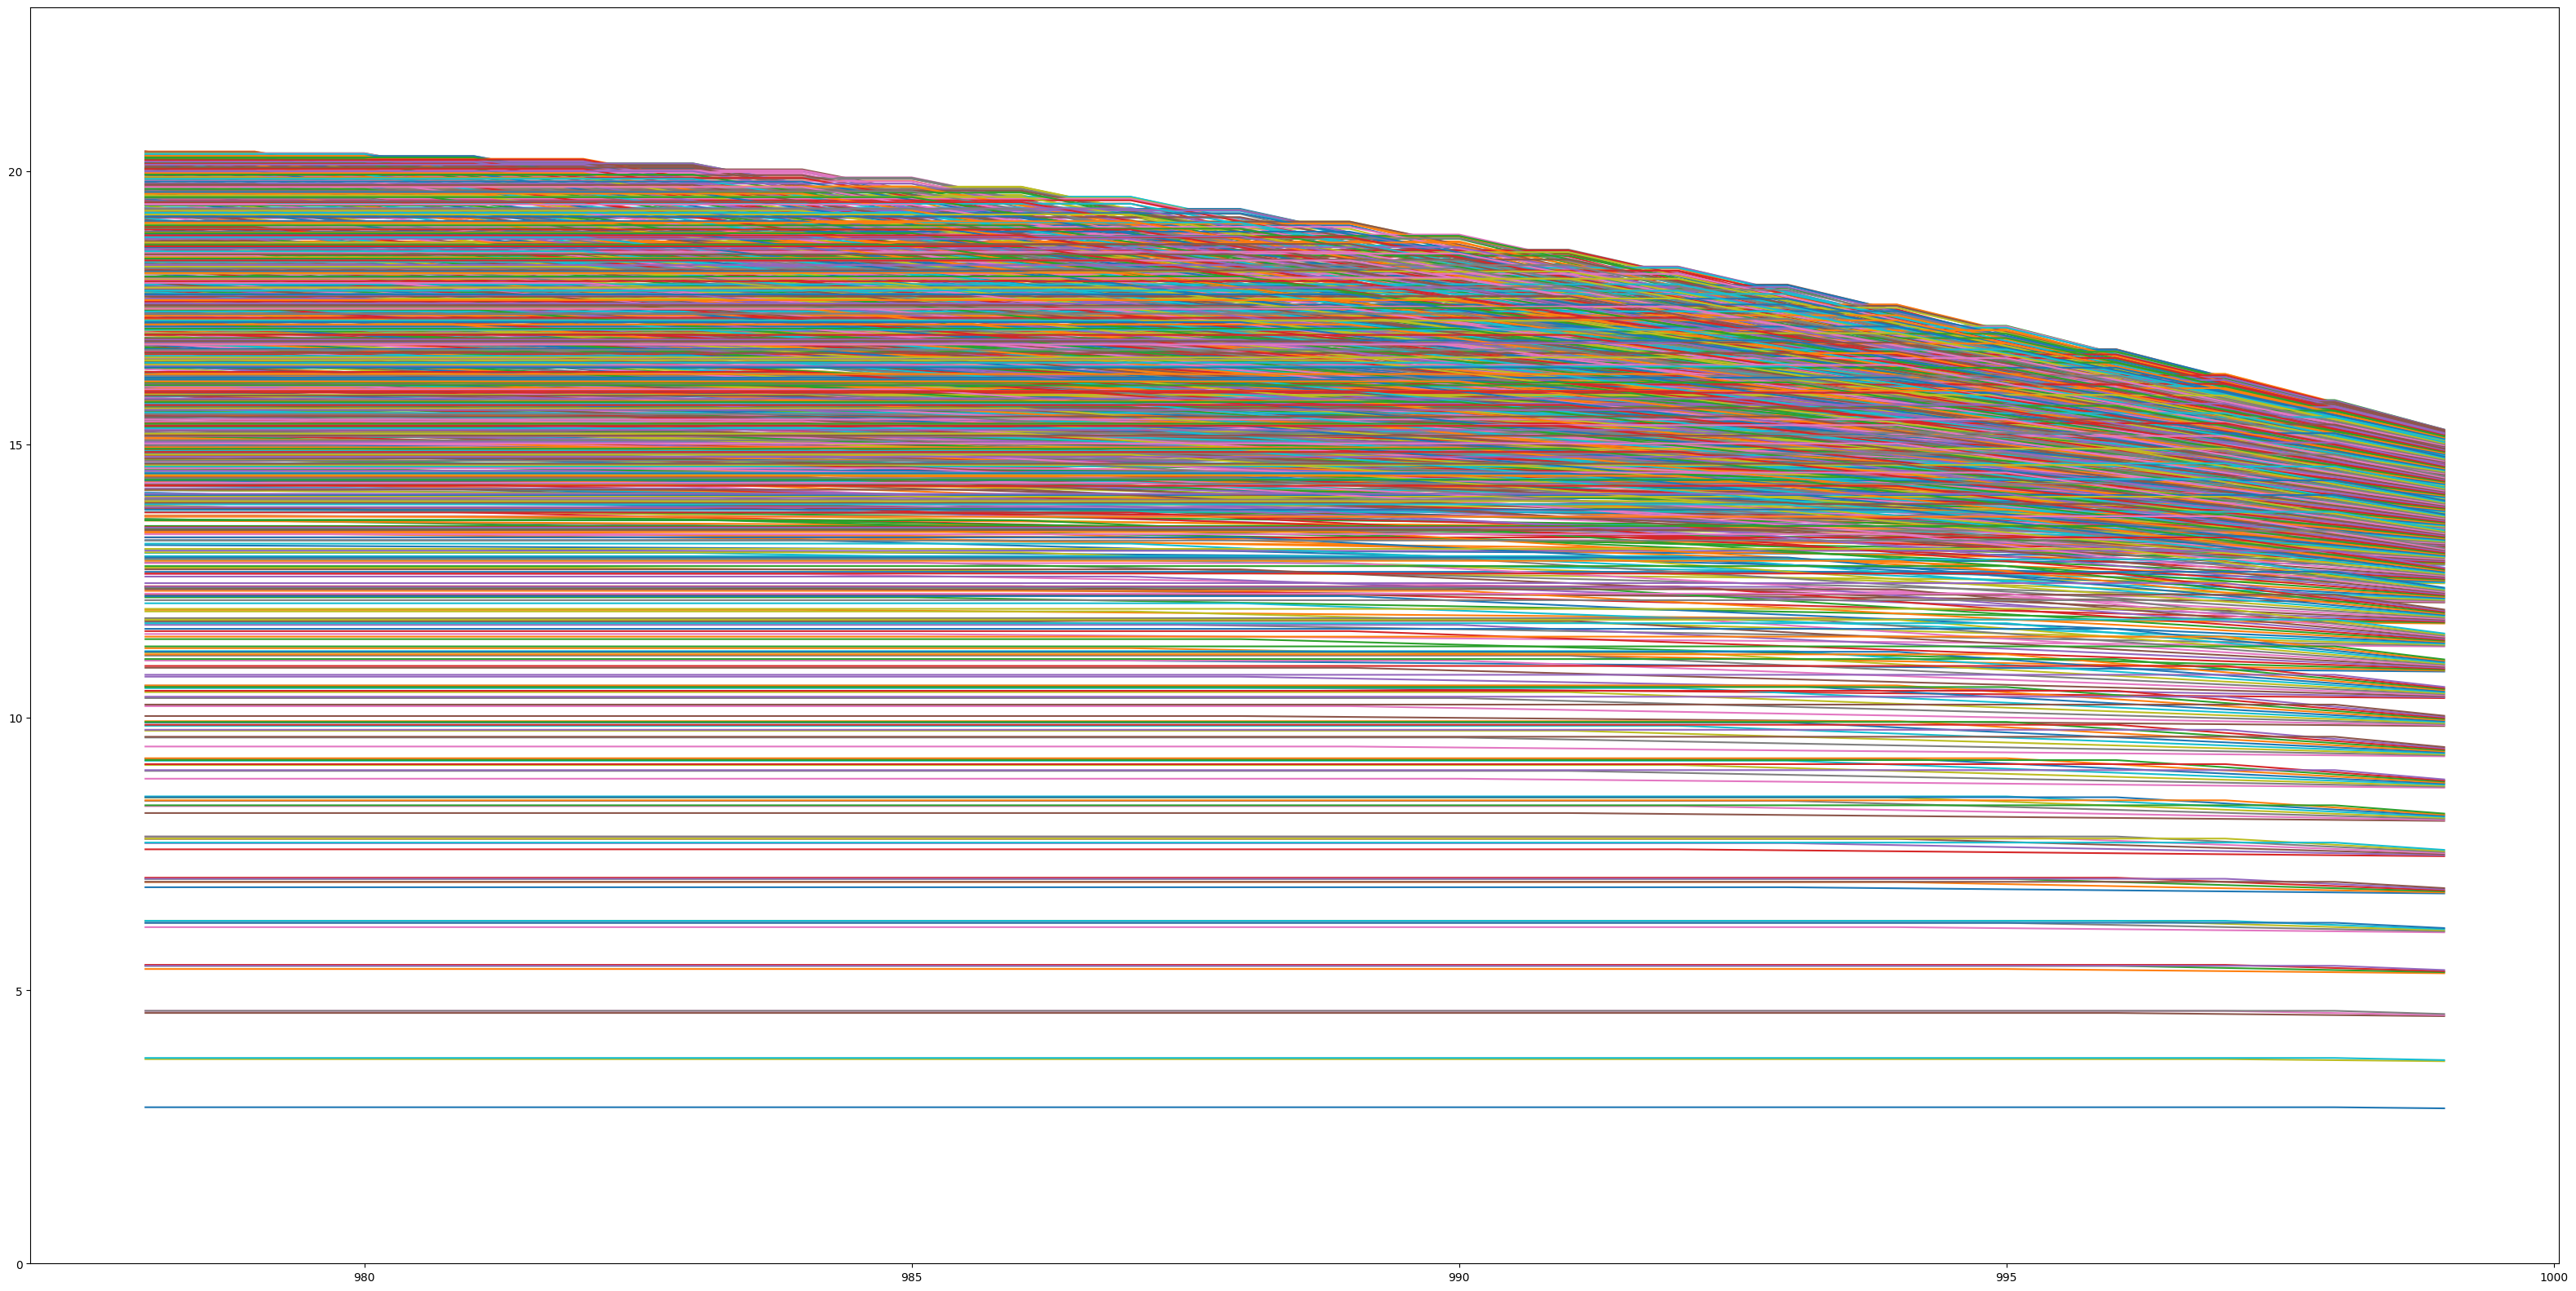

In [14]:
plt.figure(figsize=(40, 20))
# start y at 0
plt.ylim(0, 23)

expected_profits_list = []

for l in range(952, 998):
        for h in range(l + 1, 999):
            expected_profits = pd.read_csv(save_folder + f"expected_profits_{l}-{h}.csv")
            plt.plot(expected_profits["Unnamed: 0"], expected_profits["0"]/len(reserve_prices), label=f"l: {l}, h: {h}")
            expected_profits_list.append( expected_profits["0"]/len(reserve_prices))


# plt.legend()

In [15]:
expected_profits_list

[[0     978
  1     979
  2     980
  3     981
  4     982
  5     983
  6     984
  7     985
  8     986
  9     987
  10    988
  11    989
  12    990
  13    991
  14    992
  15    993
  16    994
  17    995
  18    996
  19    997
  20    998
  21    999
  Name: Unnamed: 0, dtype: int64,
  0     13.15726
  1     13.14681
  2     13.13636
  3     13.12591
  4     13.11546
  5     13.10501
  6     13.09456
  7     13.08411
  8     13.07366
  9     13.06321
  10    13.05276
  11    13.04231
  12    13.03186
  13    13.02141
  14    13.01096
  15    13.00051
  16    12.99006
  17    12.97961
  18    12.96916
  19    12.95871
  20    12.94826
  21    12.93781
  Name: 0, dtype: float64],
 [0     978
  1     979
  2     980
  3     981
  4     982
  5     983
  6     984
  7     985
  8     986
  9     987
  10    988
  11    989
  12    990
  13    991
  14    992
  15    993
  16    994
  17    995
  18    996
  19    997
  20    998
  21    999
  Name: Unnamed: 0, dtype: int64,
  

# Choose a high bid and find the low bid for it

In [12]:
h = 989
l = find_l(h=h, island_avg=h)
print(f"bids: {l, h}")

bids: (960, 989)
